# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric" 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | shenkursk
Processing Record 4 of Set 1 | edmundston
Processing Record 5 of Set 1 | inarajan village
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ketchikan
Processing Record 10 of Set 1 | osorno
Processing Record 11 of Set 1 | altai
Processing Record 12 of Set 1 | la passe
Processing Record 13 of Set 1 | berriane
Processing Record 14 of Set 1 | solnechnyy
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | las vegas
Processing Record 18 of Set 1 | novaya igirma
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | sitka
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
0                      fortuna  40.5982 -124.1573     15.52        63   
1  edinburgh of the seven seas -37.0676  -12.3116     14.69        90   
2                    shenkursk  62.1091   42.8960      1.24        84   
3                   edmundston  47.3737  -68.3251      8.13        79   
4             inarajan village  13.2736  144.7484     28.77        87   

   Cloudiness  Wind Speed Country        Date  
0           0        5.14      US  1730938814  
1          44        6.55      SH  1730938817  
2          99        4.59      RU  1730938818  
3         100        6.17      CA  1730938820  
4          99        1.33      GU  1730938821

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
0                            fortuna  40.5982 -124.1573     15.52        63   
1        edinburgh of the seven seas -37.0676  -12.3116     14.69        90   
2                          shenkursk  62.1091   42.8960      1.24        84   
3                         edmundston  47.3737  -68.3251      8.13        79   
4                   inarajan village  13.2736  144.7484     28.77        87   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                 0        5.14      US  1730938814  
1                44        6.55      SH  1730938817  
2                99        4.59      RU  1730938818  
3               100        6.17      CA  1730938820  
4                99        1.33      GU  1730938821

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

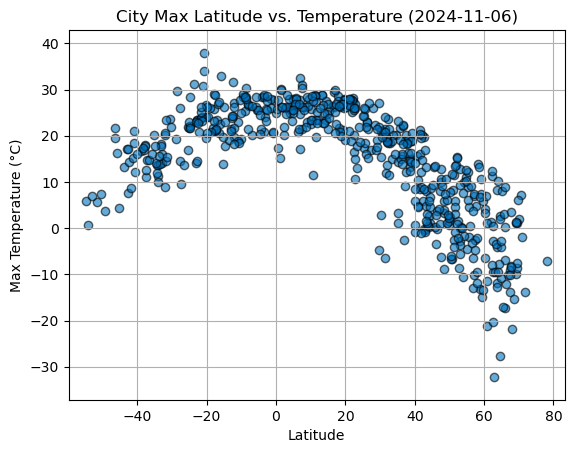

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color="#0072BD", edgecolor='black', alpha=0.6 )

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-11-06)', )
plt.xlabel('Latitude', )
plt.ylabel('Max Temperature (Â°C)', )
plt.xlim(city_data_df['Lat'].min() - 5, city_data_df['Lat'].max() + 5)  
plt.ylim(city_data_df['Max Temp'].min() - 5, city_data_df['Max Temp'].max() + 5)  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

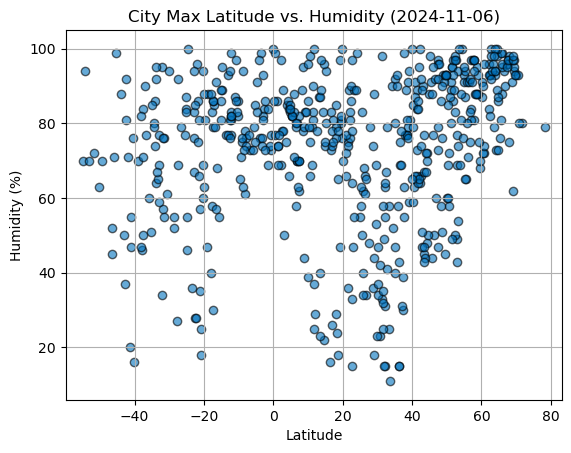

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color="#0072BD", edgecolor='black', alpha=0.6)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-11-06)', )
plt.xlabel('Latitude', )
plt.ylabel('Humidity (%)', )
plt.xlim(city_data_df['Lat'].min() - 5, city_data_df['Lat'].max() + 5)  
plt.ylim(city_data_df['Humidity'].min() - 5, city_data_df['Humidity'].max() + 5)  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

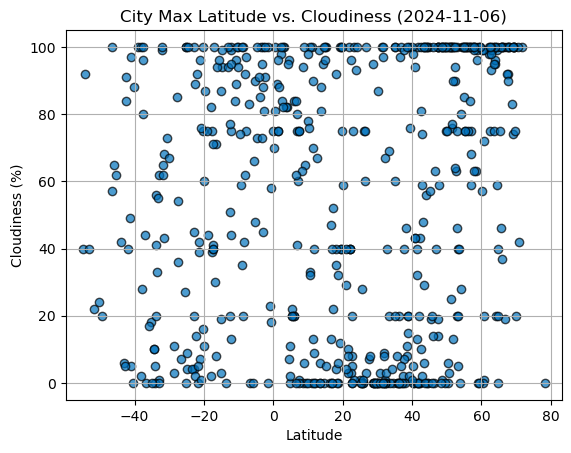

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color="#0072BD", edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2024-11-06)', )
plt.xlabel('Latitude', )
plt.ylabel('Cloudiness (%)', )
plt.xlim(city_data_df['Lat'].min() - 5, city_data_df['Lat'].max() + 5)  
plt.ylim(city_data_df['Cloudiness'].min() - 5, city_data_df['Cloudiness'].max() + 5)  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

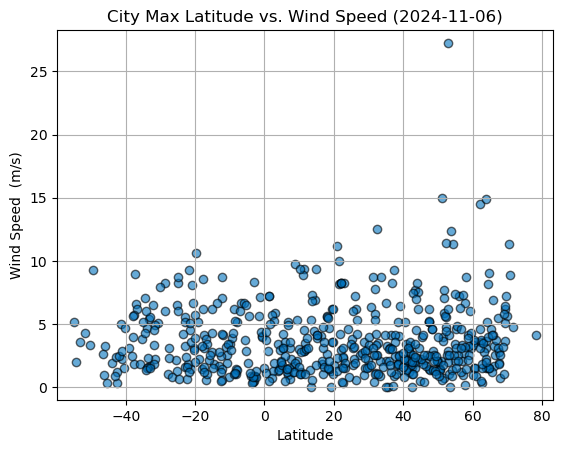

In [118]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color="#0072BD", edgecolor='black', alpha=0.6)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2024-11-06)', )
plt.xlabel('Latitude', )
plt.ylabel('Wind Speed  (m/s)', )
plt.xlim(city_data_df['Lat'].min() - 5, city_data_df['Lat'].max() + 5)  
plt.ylim(city_data_df['Wind Speed'].min() - 1, city_data_df['Wind Speed'].max() + 1)  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots

def linear_regression_plot(data, x_column, y_column):
    
    X = data[x_column]
    y = data[y_column]
    slope, intercept, r_value, p_value, std_err = linregress(X, y)
    y_pred = intercept + slope * X

     # Plot the regression line and creation of the scatter plot and regression line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(X, y, color="#0072BD", label='Data Points' )
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

    # Get limits of the axes to determine a suitable position for the annotation
    xlim = plt.xlim()
    ylim = plt.ylim()
    x_position = xlim[0] + 0.05 * (xlim[1] - xlim[0])  
    y_center = (y.min() + y.max()) / 2
    
    # Labeling and showing the plot
    plt.title(f' Latitude vs {y_column}')
    plt.xlabel("Latitude", fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.annotate(line_eq,(x_position, y_center),fontsize=15,color="red")
    print(f"The r^2-value is: {r_value**2}")
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                        
0                 fortuna  40.5982 -124.1573     15.52        63           0   
2               shenkursk  62.1091   42.8960      1.24        84          99   
3              edmundston  47.3737  -68.3251      8.13        79         100   
4        inarajan village  13.2736  144.7484     28.77        87          99   
6                qaqortoq  60.7167  -46.0333    -11.37        72           1   

         Wind Speed Country        Date  
City_ID                                  
0              5.14      US  1730938814  
2              4.59      RU  1730938818  
3              6.17      CA  1730938820  
4              1.33      GU  1730938821  
6              3.55      GL  1730938824

In [82]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                       
1        edinburgh of the seven seas -37.0676  -12.3116     14.69        90   
5                          adamstown -25.0660 -130.1015     21.76        87   
7                            ushuaia -54.8000  -68.3000      5.81        70   
9                             osorno -40.5667  -73.1500     12.17        76   
18                          waitangi -43.9535 -176.5597     13.33        88   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
1                44        6.55      SH  1730938817  
5               100        6.53      PN  1730938822  
7                40        5.14      AR  1730938602  
9                 0        1.54      CL  1730938828  
18               42        1.90      NZ  1730938839

###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7031306949056


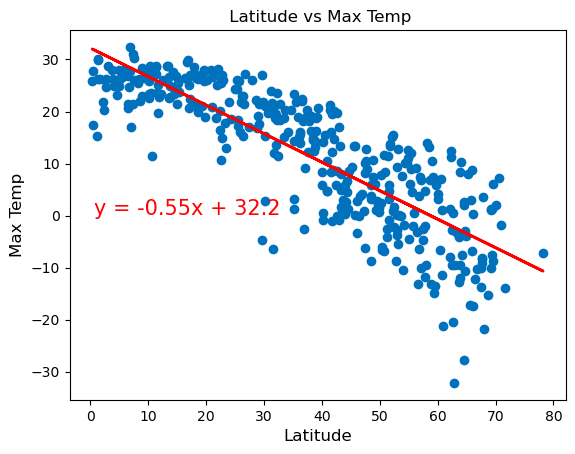

In [103]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')

The r^2-value is: 0.5067032552677196


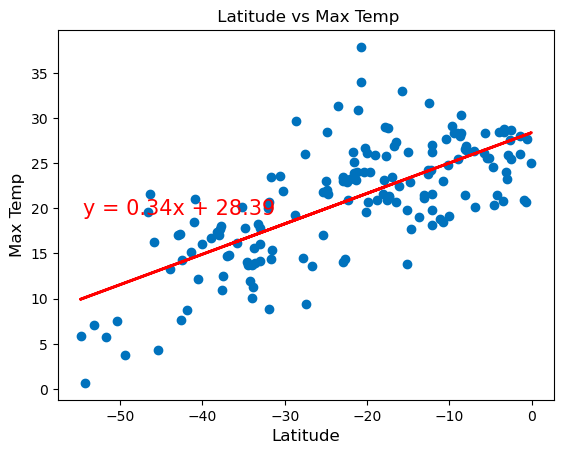

In [104]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp')

### LATITUDE VS MAX TEMP ANALYSIS

**Discussion on linear relationship:**

**Analysis of the northern hemisphere**

In the case of the northern hemisphere we have a negative correlation between latitude and maximum temperature. This is to be expected, as regions closer to the equator are known to experience warmer temperatures than those at higher latitudes. In the graph we can see that as the cities move away from the equator the temperature decreases. Another contributing factor is the time of year, as we approach winter.
The rsquared of 0.70 explains that approximately 70% of the temperature variability is due to the change in latitude, giving us a strong correlation.

**Analysis of the southern hemisphere**

In the case of the southern hemisphere we have a positive correlation between latitude and maximum temperature. As I said before, this is to be expected, since it is known that as the latitude approaches the equator, the temperature increases. In this case we have a graph that shows us the increase in temperature as cities approach the equator.
The rsquare of 0.50 tells us that for our samples we have a temperature variance of 50% given the latitude, this can be explained by the season we are in when some cities begin to feel the winter sensation.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.07877496062382723


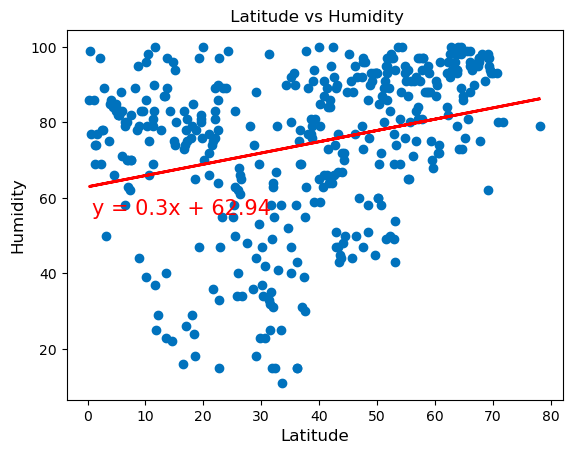

In [112]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity')

The r^2-value is: 0.07664458877723652


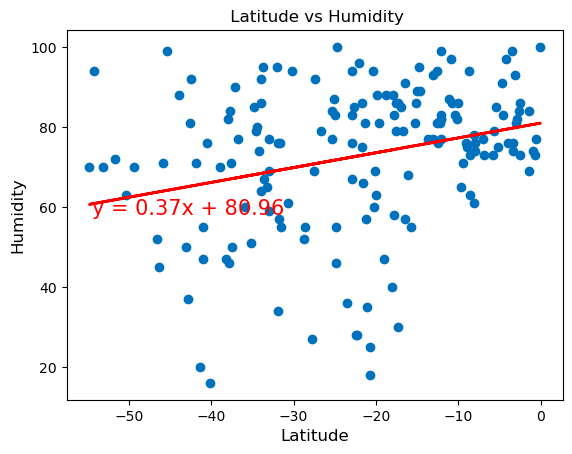

In [113]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity')

### LATITUDE VS HUMIDITY ANALYSIS

**Discussion on linear relationship:**

**Analysis of the northern hemisphere**

In the case of the northern hemisphere we have a positive but not strong correlation trend since the data seem very dispersed. This is to be expected since humidity is more related to other factors such as altitude, proximity to the ocean, soil patterns, etc.
The rsquared of 0.07 explains a very weak correlation as the data are further apart, telling us that there may be other factors affecting humidity rather than latitude alone.

**Analysis of the southern hemisphere**

In the case of the southern hemisphere, it is more or less the same as the northern hemisphere, we have a positive correlation trend, but not strong, since the data seems very scattered. Furthermore, this was to be expected since humidity is more related to other factors such as altitude, proximity to the ocean, weather patterns, soil patterns, etc.
The rsquared is very similar to the previous graph, we have an rsquared of 0.076, which tells us a very weak correlation, since the data is further apart, which tells us that there are other factors affecting humidity instead of latitude by itself.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.06561812610557165


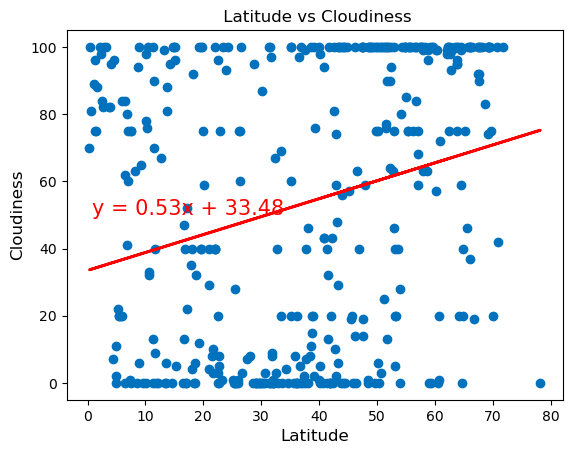

In [114]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r^2-value is: 0.05970220089320159


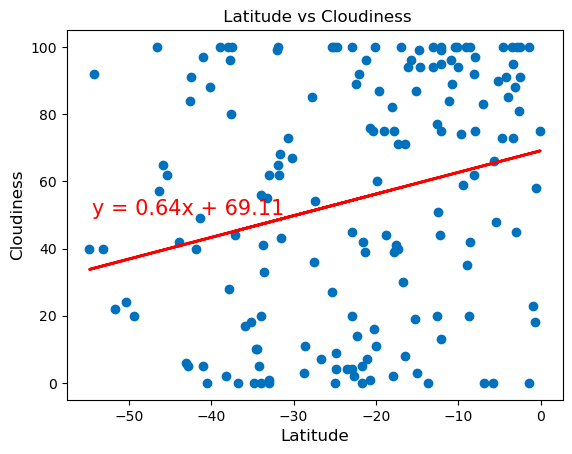

In [115]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness')

### LATITUDE VS CLOUDINESS ANALYSIS

**Discussion on linear relationship:**

**Analysis of the northern hemisphere**

In this case we have a positive slope that tells us that for every 1 degree increase in latitude the expected cloudiness increases. This indicates a slight positive relationship between the increase in both factors. However, we have a very low r-squared value, which tells us that there may be other factors stronger than latitude to explain the increase in cloudiness.
In the case of cloudiness, there may be other factors to take into account such as geographical characteristics given by urban environments, mountains, bodies of water and also the season in which northern cities tend to have a higher level of cloudiness.

**Analysis of the southern hemisphere**

In this case we also have a positive slope between cloudiness and decreasing latitude, but as in the previous case, there is a very weak rsquared value that tells us that these 2 factors are not strongly correlated, which can be explained by the factors mentioned above. in which cloudiness is more affected by other factors than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.007168203140599195


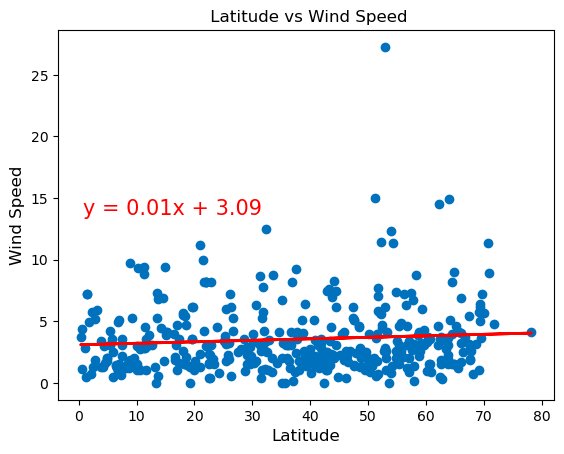

In [116]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r^2-value is: 0.004225054937078282


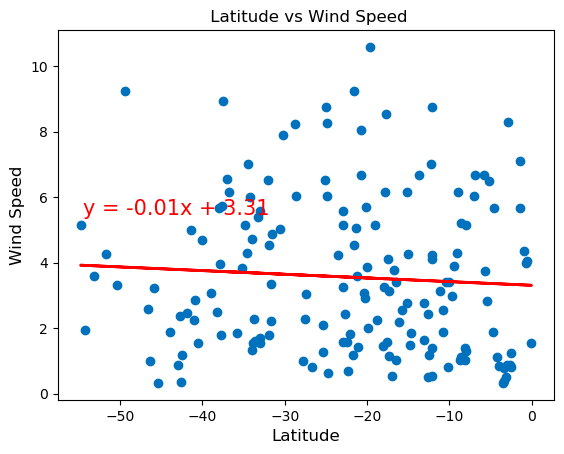

In [117]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed')

### LATITUDE VS WIND SPEED ANALYSIS

**Discussion on linear relationship:**

**Analysis of the northern hemisphere**

In this case we have a very low relationship between the parameters. We have an rsquared of 0.0072 which tells us that wind speed is probably explained by factors other than latitude.
In the case of wind speed, the strong factor to take into account is the terrain of the city, if the terrain has mountains, valleys, bodies of water. These factors directly affect wind speed. Additionally, the season of the year is another important factor to consider, as winter storms can generate more wind speed than summer seasons.

**Analysis of the southern hemisphere**

In this case we also have a very weak relationship between the parameter. As explained previously, wind speed is more affected by other parameters than by the change in latitude, whether it is the southern or northern hemisphere.